# Population vs Sample Delivery Times Histogram with KDE

This notebook creates side-by-side histograms with Kernel Density Estimates (KDE) to visually compare the distribution shape and spread of Delivery Time (Hours) between the population and the sample datasets.

Behavior:
- If a file named `delivery_times.csv` exists in the notebook directory, it will be loaded (expected columns: Order_ID, Zone, Delivery_Time_Hours).
- Otherwise synthetic population data will be generated and a sample will be drawn from it.

Outputs:
- A figure showing the population histogram + KDE (blue) and the sample histogram + KDE (orange) side-by-side.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline


In [6]:
# Try to load a CSV, otherwise generate synthetic population data
csv_path = r"C:\Users\kowsh\Downloads\d03726db-f570-4854-a268-5a92509889ff5smNX\ML374_S2_DeliverybyZone_Data_Practice.xlsx"
try:
    df = pd.read_excel(csv_path)
    if 'Delivery_Time_Hours' not in df.columns:
        raise ValueError(f"Excel file found but missing required column 'Delivery_Time_Hours'. Columns: {list(df.columns)}")
    print(f"Loaded {csv_path} with {len(df)} rows.")
except FileNotFoundError:
    print(f"{csv_path} not found. Generating synthetic data.")
    np.random.seed(0)
    # Generate a population that looks roughly like the example (center ~6, spread ~1.2)
    population = np.random.normal(loc=6, scale=1.2, size=10000)
    # Clip to realistic delivery hours
    population = np.clip(population, 1.5, 11)
    df = pd.DataFrame({
        'Order_ID': np.arange(1, len(population) + 1),
        'Zone': np.random.choice(['A', 'B', 'C', 'D'], size=len(population)),
        'Delivery_Time_Hours': population
    })

# Create a sample (e.g., n=200) drawn from the population/data
sample_size = 200
sample_df = df.sample(n=sample_size, random_state=1).reset_index(drop=True)

print('\nPopulation data (first 5 rows):')
display(df.head())
print('\nSample data (first 5 rows):')
display(sample_df.head())


C:\Users\kowsh\Downloads\d03726db-f570-4854-a268-5a92509889ff5smNX\ML374_S2_DeliverybyZone_Data_Practice.xlsx not found. Generating synthetic data.

Population data (first 5 rows):


,Order_ID,Zone,Delivery_Time_Hours
0,1,A,8.116863
1,2,A,6.480189
2,3,A,7.174486
3,4,B,8.689072
4,5,D,8.241070



Sample data (first 5 rows):


,Order_ID,Zone,Delivery_Time_Hours
0,9954,B,8.384278
1,3851,D,4.619273
2,4963,B,7.443321
3,3887,B,6.075551
4,5438,C,5.140028


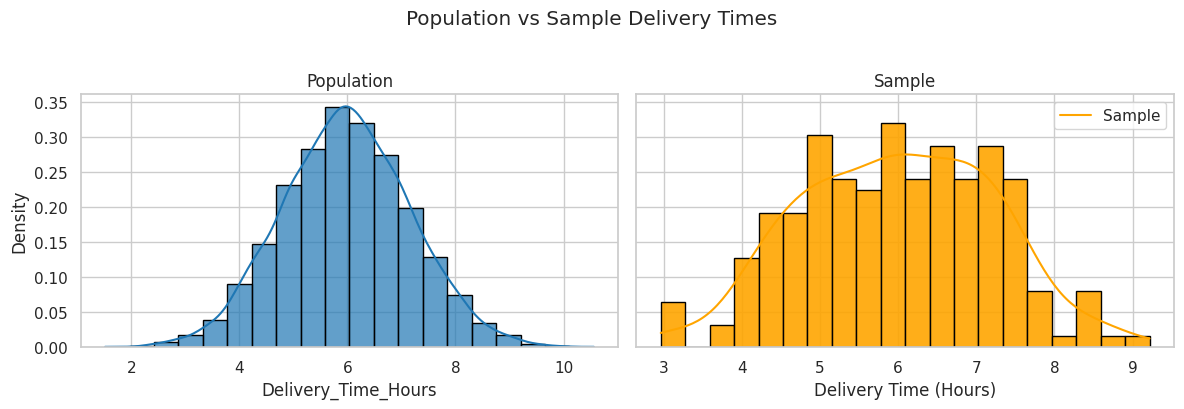

In [7]:
# Plot side-by-side histograms with KDE
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# Population plot (left)
sns.histplot(
    df['Delivery_Time_Hours'],
    kde=True,
    stat='density',
    bins=20,
    color='tab:blue',
    edgecolor='black',
    alpha=0.7,
    ax=axes[0],
)
axes[0].set_title('Population')
axes[0].set_xlabel('Delivery_Time_Hours')
axes[0].set_ylabel('Density')

# Sample plot (right)
sns.histplot(
    sample_df['Delivery_Time_Hours'],
    kde=True,
    stat='density',
    bins=20,
    color='orange',
    edgecolor='black',
    alpha=0.9,
    ax=axes[1],
)
axes[1].set_title('Sample')
axes[1].set_xlabel('Delivery Time (Hours)')
axes[1].set_ylabel('Density')
axes[1].legend(['Sample'])

plt.suptitle('Population vs Sample Delivery Times', y=1.02)
plt.tight_layout()
plt.show()


In [ ]:
# Save figure to file
out_path = 'population_vs_sample_delivery_times.png'
fig.savefig(out_path, dpi=150, bbox_inches='tight')
print(f"Saved figure to {out_path}")
